# Test the predictions of the model on a sample melody

In [1]:
from score_parser import parseScore
from input_representations import Bass19
from output_representations import available_representations as availableOutputs
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
gpu_devices = tf.config.experimental.list_physical_devices("GPU")
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

Loading the melody

In [3]:
melodyExample = "./rachmaninoff3.mxl"

In [4]:
df = parseScore(melodyExample)

In [5]:
melodyInput = Bass19(df)

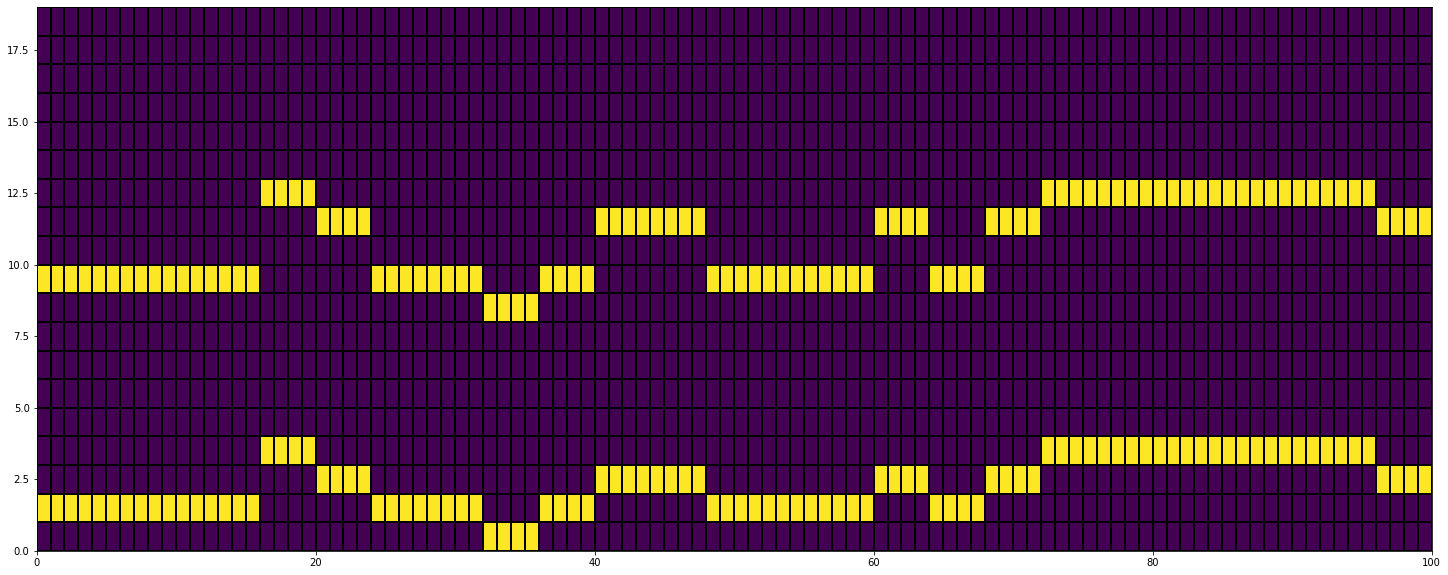

In [6]:
plt.figure(figsize=(25,10))
plt.pcolormesh(melodyInput.array[:100].T, edgecolors="k")

Loading the pre-trained model

In [7]:
modelPath = ".model_checkpoint/validationset/bps-lr01-0001-210530T233203/55-4.109-0.7956.hdf5"
model = keras.models.load_model(modelPath)

In [8]:
outputLayers = [l.name.split("/")[0] for l in model.outputs]

In [9]:
inputProcessed = melodyInput.array[:640].reshape(1, 640, 19)
modelInput = [inputProcessed, inputProcessed]
inputProcessed.shape

(1, 640, 19)

In [10]:
predictions = model.predict(modelInput)

In [11]:
dfdict = {}
for outputRepr, pred in zip(outputLayers, predictions):
    print(outputRepr, pred.shape)
    predOnehot = np.argmax(pred[0], axis=1).reshape(-1, 1)
    decoded = availableOutputs[outputRepr].decode(predOnehot) 
    dfdict[outputRepr] = decoded
df = pd.DataFrame(dfdict)

LocalKey35 (1, 640, 35)
PrimaryDegree22 (1, 640, 22)
SecondaryDegree22 (1, 640, 22)
Inversion4 (1, 640, 4)
ChordQuality15 (1, 640, 16)
ChordRoot35 (1, 640, 35)
Bass35 (1, 640, 35)
RomanNumeral76 (1, 640, 76)
TonicizedKey35 (1, 640, 35)
PitchClassSet94 (1, 640, 94)
HarmonicRhythm2 (1, 640, 2)


In [12]:
pd.set_option('display.max_rows', 640)
df

,LocalKey35,PrimaryDegree22,SecondaryDegree22,Inversion4,ChordQuality15,ChordRoot35,Bass35,RomanNumeral76,TonicizedKey35,PitchClassSet94,HarmonicRhythm2
0,d,1,None,0,minor triad,D,D,i,d,"(2, 5, 9)",False
1,d,1,None,0,minor triad,D,D,i,d,"(2, 5, 9)",False
2,d,1,None,0,minor triad,D,D,i,d,"(2, 5, 9)",False
3,d,1,None,0,minor triad,D,D,i,d,"(2, 5, 9)",False
4,d,1,None,0,minor triad,D,D,i,d,"(2, 5, 9)",False
5,d,1,None,0,minor triad,D,D,i,d,"(2, 5, 9)",False
6,d,1,None,0,minor triad,D,D,i,d,"(2, 5, 9)",False
7,d,1,None,0,minor triad,D,D,i,d,"(2, 5, 9)",False
8,d,1,None,0,minor triad,D,D,i,d,"(2, 5, 9)",False
9,d,1,None,0,minor triad,D,D,i,d,"(2, 5, 9)",False


In [13]:
df.to_csv("rachmaninoff_analysis.csv")